In [2]:
# Importing the required libraries for data manipulation, visualization, and model building
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading the training dataset into a pandas DataFrame
train_file = pd.read_csv("Train.csv")

# Displaying the first 10 rows of the dataset for an initial look
train_file.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [4]:
# Displaying summary statistics of the numerical columns in the dataset
train_file.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
# Getting information about the dataset (column names, data types, null values, etc.)
train_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
# Checking the number of missing values in each column
print(train_file.isna().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [7]:
# Filling missing values in the 'Item_Weight' column with the column's mean
train_file["Item_Weight"] = train_file["Item_Weight"].fillna(train_file["Item_Weight"].mean())

# Confirming that the missing values are filled in 'Item_Weight'
print(train_file["Item_Weight"].isna().sum())

0


In [8]:
# Filling missing values in the 'Outlet_Size' column with its mode (most frequent value)
train_file['Outlet_Size'] = train_file['Outlet_Size'].fillna(train_file['Outlet_Size'].mode()[0])

# Confirming that the missing values are filled in 'Outlet_Size'
print(train_file["Outlet_Size"].isna().sum())

0


In [9]:
# Encoding the 'Outlet_Size' column with numerical values for machine learning purposes
train_file.replace({'Outlet_Size': {'Small': 0, 'Medium': 1, 'High': 2}}, inplace=True)

# Checking the value counts to ensure correct encoding
print(train_file["Outlet_Size"].value_counts())

Outlet_Size
1    5203
0    2388
2     932
Name: count, dtype: int64


C:\Users\abinesh\AppData\Local\Temp\ipykernel_12572\1998457099.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_file.replace({'Outlet_Size': {'Small': 0, 'Medium': 1, 'High': 2}}, inplace=True)


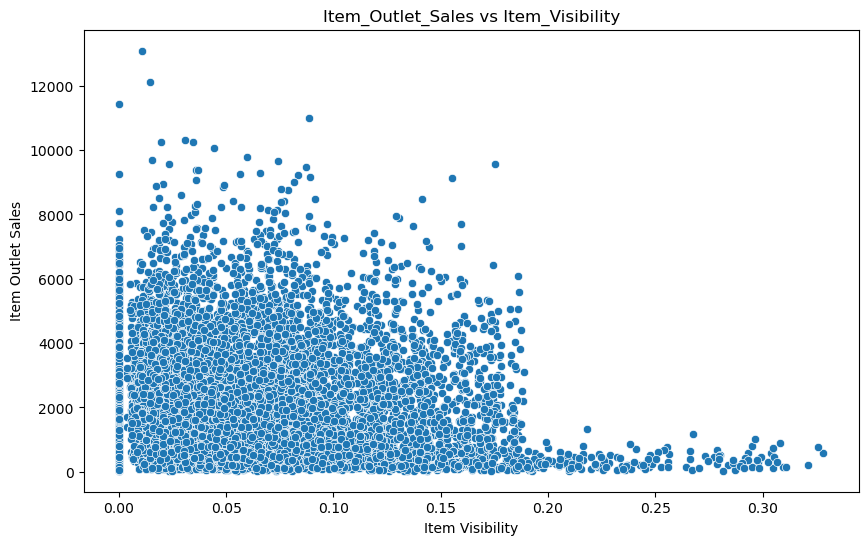

In [10]:
# Plotting a scatter plot to observe the relationship between 'Item_Visibility' and 'Item_Outlet_Sales'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train_file['Item_Visibility'], y=train_file['Item_Outlet_Sales'])
plt.title('Item_Outlet_Sales vs Item_Visibility')
plt.xlabel('Item Visibility')
plt.ylabel('Item Outlet Sales')
plt.show()

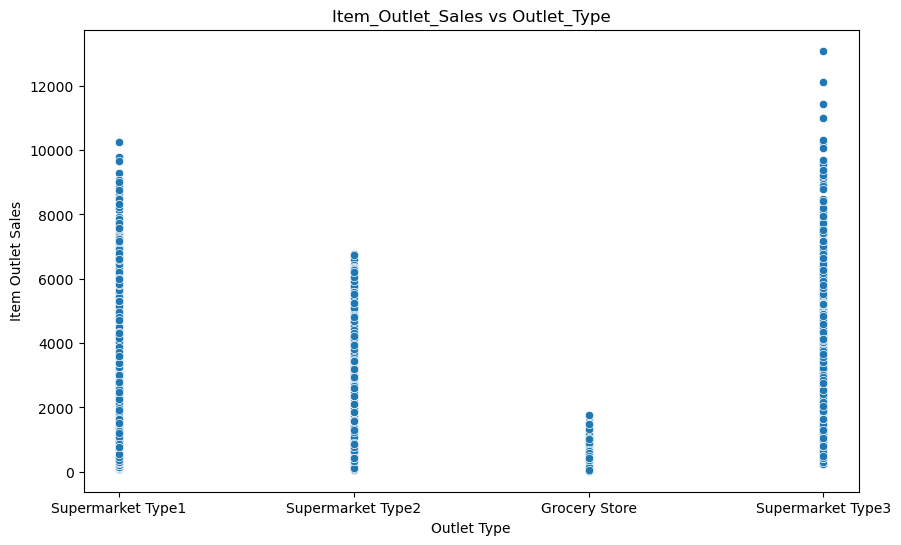

In [11]:
# Plotting a scatter plot to observe the relationship between 'Outlet_Type' and 'Item_Outlet_Sales'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train_file['Outlet_Type'], y=train_file['Item_Outlet_Sales'])
plt.title('Item_Outlet_Sales vs Outlet_Type')
plt.xlabel('Outlet Type')
plt.ylabel('Item Outlet Sales')
plt.show()

In [12]:
# Checking the unique values in the 'Item_Fat_Content' column
print(train_file['Item_Fat_Content'].value_counts())

# Replacing inconsistent values in the 'Item_Fat_Content' column
train_file.replace({'Item_Fat_Content': {'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'}}, inplace=True)

# Checking the updated unique values to confirm corrections
print(train_file['Item_Fat_Content'].value_counts())

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64
Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64


In [13]:
from sklearn.preprocessing import LabelEncoder

# Initializing the LabelEncoder
encoder = LabelEncoder()

# Encoding categorical columns into numeric values
train_file['Item_Fat_Content'] = encoder.fit_transform(train_file['Item_Fat_Content'])
train_file['Item_Type'] = encoder.fit_transform(train_file['Item_Type'])
train_file['Outlet_Location_Type'] = encoder.fit_transform(train_file['Outlet_Location_Type'])
train_file['Outlet_Type'] = encoder.fit_transform(train_file['Outlet_Type'])
train_file['Item_Identifier'] = encoder.fit_transform(train_file['Item_Identifier'])
train_file['Outlet_Identifier'] = encoder.fit_transform(train_file['Outlet_Identifier'])

# Displaying the first few rows to verify the encoding
train_file.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,2,2,1,994.7052


In [14]:
# Applying log transformation to 'Item_Visibility and 'Outlet_Type' to reduce skewness
train_file['Item_Visibility'] = np.log1p(train_file['Item_Visibility'])  # log1p handles zero values safely
train_file['Outlet_Type'] = np.log1p(train_file['Outlet_Type'])  # assuming Outlet_Type is already numeric

# Displaying the transformed columns for verification
print(train_file[['Item_Visibility', 'Outlet_Type']].head())

   Item_Visibility  Outlet_Type
0         0.015920     0.693147
1         0.019095     1.098612
2         0.016621     0.693147
3         0.000000     0.000000
4         0.000000     0.693147


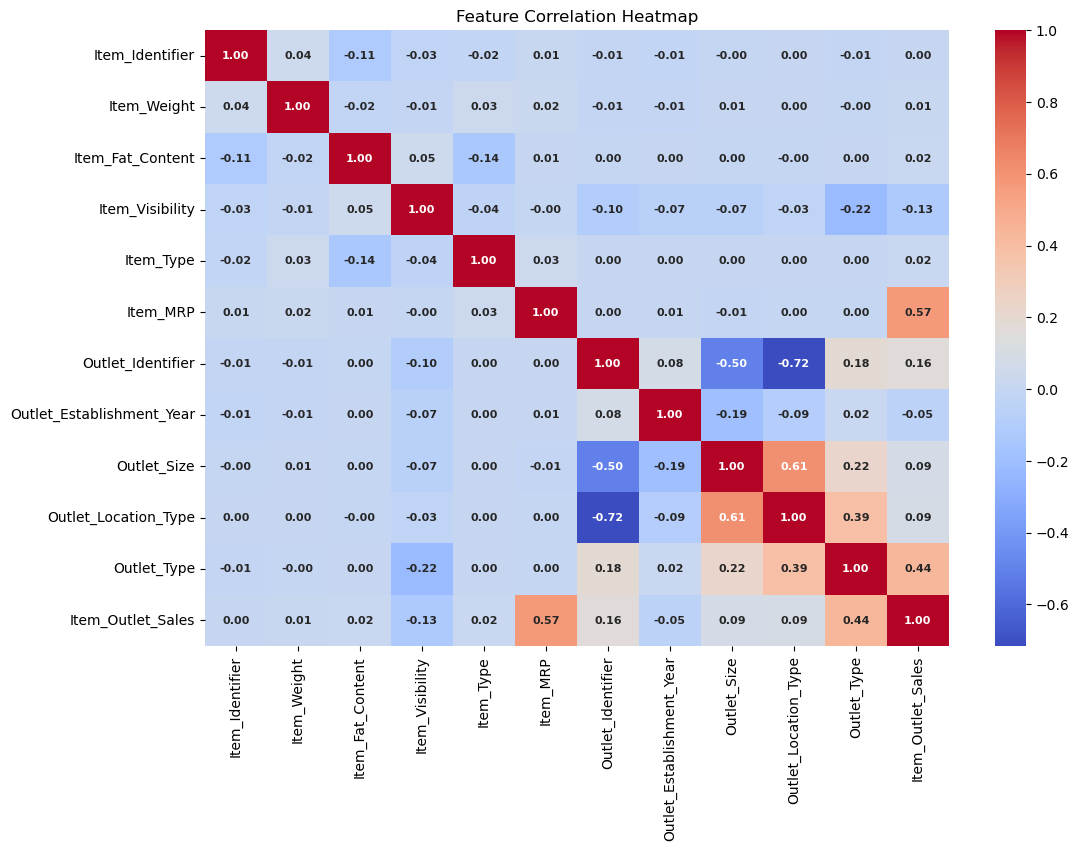

In [15]:
# Plotting a heatmap to visualize correlations between features
plt.figure(figsize=(12, 8))
sns.heatmap(train_file.corr(), annot=True, fmt='.2f', cmap='coolwarm', annot_kws={"size": 8, "weight": "bold"})
plt.title('Feature Correlation Heatmap')
plt.show();

In [16]:
# Dropping unnecessary columns for model training
columns_to_drop = ['Outlet_Identifier', 'Item_Identifier', 'Item_Weight', 
                   'Item_Fat_Content', 'Item_Type', 'Outlet_Establishment_Year']
train_file = train_file.drop(columns=columns_to_drop, axis=1)

# Checking the updated DataFrame
train_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Visibility       8523 non-null   float64
 1   Item_MRP              8523 non-null   float64
 2   Outlet_Size           8523 non-null   int64  
 3   Outlet_Location_Type  8523 non-null   int32  
 4   Outlet_Type           8523 non-null   float64
 5   Item_Outlet_Sales     8523 non-null   float64
dtypes: float64(4), int32(1), int64(1)
memory usage: 366.4 KB


In [17]:
# Splitting the dataset into features (X) and target variable (y)
X = train_file.drop(["Item_Outlet_Sales"], axis=1)
y = train_file["Item_Outlet_Sales"]

# Applying log transformation to the target variable to reduce skewness
y = np.log1p(y)

# Splitting into training and testing sets
from sklearn.model_selection import train_test_split
np.random.seed(42)  # Ensuring reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Verifying the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (6818, 5) (6818,)
Testing set shape: (1705, 5) (1705,)


In [20]:
# Importing the required libraries and modules
from sklearn.ensemble import RandomForestRegressor  # For the Random Forest model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error  # For model evaluation

# Initializing the Random Forest Regressor
rf_model = RandomForestRegressor(
    n_estimators=100,          # Number of trees in the forest
    max_depth=8,               # Maximum depth of the tree
    random_state=42,           # Ensures reproducibility
    min_samples_split=5,       # Minimum number of samples required to split an internal node
    min_samples_leaf=1,        # Minimum number of samples required to be at a leaf node
    max_features="log2"        # Number of features to consider when looking for the best split
)

# Training the model on the training set
rf_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluating the Random Forest Regressor model
r2_rf = r2_score(y_test, y_pred_rf)  # R-squared score
mae_rf = mean_absolute_error(y_test, y_pred_rf)  # Mean Absolute Error
mse_rf = mean_squared_error(y_test, y_pred_rf)  # Mean Squared Error

# Displaying the evaluation metrics
print("Random Forest Regressor R2 Score:", r2_rf)
print("Mean Absolute Error (MAE):", mae_rf)
print("Mean Squared Error (MSE):", mse_rf)

Random Forest Regressor R2 Score: 0.7258912641591193
Mean Absolute Error (MAE): 0.41772658682148134
Mean Squared Error (MSE): 0.2918252361446071


In [21]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Defining the hyperparameter grid
param_dist = {
    'n_estimators': randint(100, 200),
    'max_depth': [5, 10, 15, None],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4),
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initializing RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=100,
    cv=4,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fitting RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Extracting the best parameters and the best model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Evaluating the tuned model
best_r2 = best_model.score(X_test, y_test)
print("Best Parameters from RandomizedSearchCV:", best_params)
print("Best R2 Score of Tuned Random Forest Regressor:", best_r2)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


C:\Users\abinesh\Desktop\project_1\env\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
148 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
74 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\abinesh\Desktop\project_1\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abinesh\Desktop\project_1\env\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\abinesh\Desktop\project_1\env\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constr

Best Parameters from RandomizedSearchCV: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 9, 'n_estimators': 145}
Best R2 Score of Tuned Random Forest Regressor: 0.7238688202545125


In [22]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Initializing the Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(
    n_estimators=100, 
    max_depth=2, 
    learning_rate=0.1, 
    random_state=42
)

# Training the model on the training set
gbr_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred_gbr = gbr_model.predict(X_test)

# Evaluating the Gradient Boosting Regressor model
r2_gbr = r2_score(y_test, y_pred_gbr)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)

# Displaying the evaluation metrics
print("Gradient Boosting Regressor R2 Score:", r2_gbr)
print("Mean Absolute Error (MAE):", mae_gbr)
print("Mean Squared Error (MSE):", mse_gbr)

Gradient Boosting Regressor R2 Score: 0.7310916135010287
Mean Absolute Error (MAE): 0.4093736008562516
Mean Squared Error (MSE): 0.28628877204731495


C:\Users\abinesh\AppData\Local\Temp\ipykernel_12572\2644899011.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=performance_df, x="Model", y="R2 Score", palette="viridis")


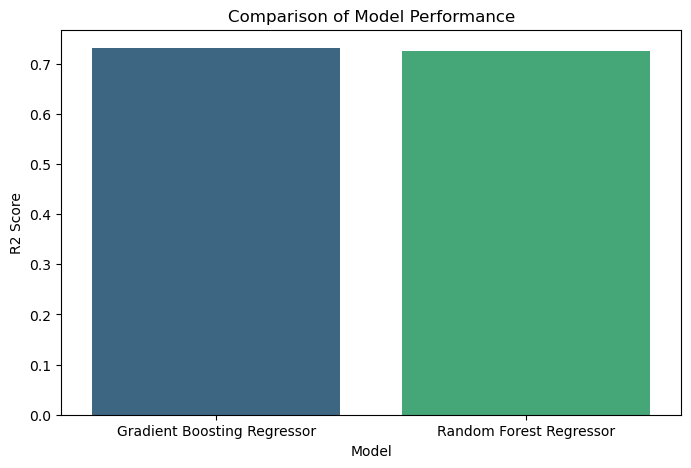

In [23]:
# Creating a DataFrame to compare the R2 scores of different models
performance_df = pd.DataFrame({
    "Model": ["Gradient Boosting Regressor", "Random Forest Regressor"],
    "R2 Score": [r2_gbr, r2_rf]
})

# Plotting a bar chart to visualize the R2 scores
plt.figure(figsize=(8, 5))
sns.barplot(data=performance_df, x="Model", y="R2 Score", palette="viridis")
plt.title("Comparison of Model Performance")
plt.xlabel("Model")
plt.ylabel("R2 Score")
plt.show()

# test file

In [24]:
# Load the dataset from a CSV file
test_file = pd.read_csv("test.csv")

In [25]:
# Display information about the dataset
test_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [26]:
# Display the first 10 rows of the dataset
test_file.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
5,FDH56,9.800,Regular,0.063817,Fruits and Vegetables,117.1492,OUT046,1997,Small,Tier 1,Supermarket Type1
6,FDL48,19.350,Regular,0.082602,Baking Goods,50.1034,OUT018,2009,Medium,Tier 3,Supermarket Type2
7,FDC48,NaN,Low Fat,0.015782,Baking Goods,81.0592,OUT027,1985,Medium,Tier 3,Supermarket Type3
8,FDN33,6.305,Regular,0.123365,Snack Foods,95.7436,OUT045,2002,NaN,Tier 2,Supermarket Type1
9,FDA36,5.985,Low Fat,0.005698,Baking Goods,186.8924,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [27]:
# Display the shape of the dataset (rows, columns)
print(f"Dataset Shape: {test_file.shape}")

Dataset Shape: (5681, 11)


In [28]:
# Provide summary statistics for numerical columns
test_file.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [29]:
# Check the number of missing values in each column
print("Missing Values Before Handling:")
print(test_file.isnull().sum())

Missing Values Before Handling:
Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64


In [30]:
# Fill missing values in 'Item_Weight' with the column's mean
mean_item_weight = test_file["Item_Weight"].mean()
test_file["Item_Weight"] = test_file["Item_Weight"].fillna(mean_item_weight)

In [31]:
# Verify that missing values in 'Item_Weight' are filled
print(f"Missing Values in 'Item_Weight': {test_file['Item_Weight'].isna().sum()}")

Missing Values in 'Item_Weight': 0


In [32]:
# Fill missing values in 'Outlet_Size' with the column's mode
mode_outlet_size = test_file['Outlet_Size'].mode()[0]
test_file['Outlet_Size'] = test_file['Outlet_Size'].fillna(mode_outlet_size)

In [33]:
# Verify that missing values in 'Outlet_Size' are filled
print(f"Missing Values in 'Outlet_Size': {test_file['Outlet_Size'].isna().sum()}")

Missing Values in 'Outlet_Size': 0


In [34]:
# Check the unique values in 'Item_Fat_Content' before standardization
print("Unique Values in 'Item_Fat_Content' Before Replacement:")
print(test_file['Item_Fat_Content'].value_counts())


Unique Values in 'Item_Fat_Content' Before Replacement:
Item_Fat_Content
Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: count, dtype: int64


In [35]:
# Standardize the 'Item_Fat_Content' column
test_file.replace({'Item_Fat_Content': {'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'}}, inplace=True)

# Verify the changes in 'Item_Fat_Content'
print("Unique Values in 'Item_Fat_Content' After Replacement:")
print(test_file['Item_Fat_Content'].value_counts())

Unique Values in 'Item_Fat_Content' After Replacement:
Item_Fat_Content
Low Fat    3668
Regular    2013
Name: count, dtype: int64


In [36]:
# Check the unique values in 'Outlet_Size' before encoding
print("Unique Values in 'Outlet_Size' Before Encoding:")
print(test_file["Outlet_Size"].value_counts())

Unique Values in 'Outlet_Size' Before Encoding:
Outlet_Size
Medium    3468
Small     1592
High       621
Name: count, dtype: int64


In [37]:
# Encode the 'Outlet_Size' column (ordinal encoding)
test_file.replace({'Outlet_Size': {'Small': 0, 'Medium': 1, 'High': 2}}, inplace=True)

# Verify the encoding of 'Outlet_Size'
print("Unique Values in 'Outlet_Size' After Encoding:")
print(test_file["Outlet_Size"].value_counts())

Unique Values in 'Outlet_Size' After Encoding:
Outlet_Size
1    3468
0    1592
2     621
Name: count, dtype: int64


C:\Users\abinesh\AppData\Local\Temp\ipykernel_12572\4280586951.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_file.replace({'Outlet_Size': {'Small': 0, 'Medium': 1, 'High': 2}}, inplace=True)


In [38]:
# Importing LabelEncoder for encoding categorical variables
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# Encoding categorical columns
test_file['Item_Fat_Content'] = encoder.fit_transform(test_file['Item_Fat_Content'])
test_file['Item_Type'] = encoder.fit_transform(test_file['Item_Type'])
test_file['Outlet_Location_Type'] = encoder.fit_transform(test_file['Outlet_Location_Type'])
test_file['Outlet_Type'] = encoder.fit_transform(test_file['Outlet_Type'])
test_file['Item_Identifier'] = encoder.fit_transform(test_file['Item_Identifier'])
test_file['Outlet_Identifier'] = encoder.fit_transform(test_file['Outlet_Identifier'])

# Display the first few rows after encoding
test_file.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,0,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300000,1,0.038428,4,87.3198,2,2007,1,1,1
2,1406,14.600000,0,0.099575,11,241.7538,0,1998,1,2,0
3,809,7.315000,0,0.015388,13,155.0340,2,2007,1,1,1
4,1184,12.695633,1,0.118599,4,234.2300,5,1985,1,2,3


In [39]:
# Apply log transformation to 'Item_Visibility' to reduce skewness
# 'log1p' is used to safely handle zero values
test_file['Item_Visibility'] = np.log1p(test_file['Item_Visibility'])

# Apply log transformation to 'Outlet_Type' (assumes it's already numeric)
test_file['Outlet_Type'] = np.log1p(test_file['Outlet_Type'])

# Display the transformed columns
print("Transformed Columns:")
print(test_file[['Item_Visibility', 'Outlet_Type']].head())

# Display the first few rows of the updated dataset
test_file.head()

Transformed Columns:
   Item_Visibility  Outlet_Type
0         0.007536     0.693147
1         0.037708     0.693147
2         0.094924     0.000000
3         0.015271     0.693147
4         0.112077     1.386294


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,0,0.007536,13,107.8622,9,1999,1,0,0.693147
1,1067,8.300000,1,0.037708,4,87.3198,2,2007,1,1,0.693147
2,1406,14.600000,0,0.094924,11,241.7538,0,1998,1,2,0.000000
3,809,7.315000,0,0.015271,13,155.0340,2,2007,1,1,0.693147
4,1184,12.695633,1,0.112077,4,234.2300,5,1985,1,2,1.386294


In [40]:
# Drop irrelevant or unnecessary columns from the test dataset
columns_to_drop = ['Outlet_Identifier', 'Item_Identifier', 'Item_Weight', 
                   'Item_Fat_Content', 'Item_Type', 'Outlet_Establishment_Year']
test_file = test_file.drop(columns=columns_to_drop, axis=1)

# Display the structure of the updated dataset
test_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Visibility       5681 non-null   float64
 1   Item_MRP              5681 non-null   float64
 2   Outlet_Size           5681 non-null   int64  
 3   Outlet_Location_Type  5681 non-null   int32  
 4   Outlet_Type           5681 non-null   float64
dtypes: float64(3), int32(1), int64(1)
memory usage: 199.9 KB


In [47]:
# Apply log1p transformation to the entire test dataset for consistency
test_file_log = np.log1p(test_file)

# Predicting on the test dataset using the trained model
test_pred_file = gbr_model.predict(test_file_log)

# Convert log-transformed predictions back to their original scale
test_pred = np.expm1(test_pred_file)

# Display the first 10 predicted values
print("First 10 Predicted Values:", test_pred[:10])

First 10 Predicted Values: [482.64004487 517.4738352   73.63300494 482.64004487 514.92328415
 531.54006595 518.0092176  482.64004487 514.92328415 482.64004487]


In [42]:
# Display the structure of the training file for reference
train_file.info()

# Importing necessary libraries
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Define columns required for prediction
columns = ["Item_Visibility", "Item_MRP", 
           "Outlet_Size", "Outlet_Location_Type", "Outlet_Type"]

# Initialize an empty DataFrame to collect user input
cols_df = pd.DataFrame()

# Collect user input for required columns
for col in columns:
    if col in ["Outlet_Identifier", "Outlet_Size", "Outlet_Location_Type", "Outlet_Type"]:
        user_input = input(f"Enter value for {col}: ")
        cols_df[col] = [user_input]
    else:
        cols_df[col] = [float(input(f"Enter value for {col}: "))]

# Encode categorical attributes in the user input
encoder = LabelEncoder()
for col in cols_df.columns:
    if cols_df[col].dtype == "object":
        cols_df[col] = encoder.fit_transform(cols_df[col])

# Predict sales value using the trained model
cus_pred_value = random_search.predict(cols_df)

# Display the predicted sales value
print(f"Predicted Sales Value: {np.expm1(cus_pred_value[0])}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Visibility       8523 non-null   float64
 1   Item_MRP              8523 non-null   float64
 2   Outlet_Size           8523 non-null   int64  
 3   Outlet_Location_Type  8523 non-null   int32  
 4   Outlet_Type           8523 non-null   float64
 5   Item_Outlet_Sales     8523 non-null   float64
dtypes: float64(4), int32(1), int64(1)
memory usage: 366.4 KB


Enter value for Item_Visibility:  0.1111
Enter value for Item_MRP:  33.33
Enter value for Outlet_Size:  medium
Enter value for Outlet_Location_Type:  tier 3
Enter value for Outlet_Type:  grocery store


Predicted Sales Value: 4.289467324310122


# Converting into pickle file

In [43]:
import pickle

In [44]:
# Save the trained Gradient Boosting model to a file using pickle
# The model is serialized and stored as 'Sales_Pred_Original-3.pkl' for later use
with open("Sales_Pred_GradientBoost.pkl", "wb") as file:
    pickle.dump(gbr_model, file)

In [45]:
# Load the saved Gradient Boosting model from the pickle file
with open("Sales_Pred_GradientBoost.pkl", "rb") as file:
    gbr_model = pickle.load(file)

In [46]:
# Making predictions on the test dataset using the trained Gradient Boosting Regressor model
y_pred = gbr_model.predict(X_test)  # Predicting the logarithmic sales values

# Converting the predicted logarithmic values back to their original scale using the exponential function
y_pred_anti_log = np.expm1(y_pred)

# Displaying the first 10 predicted values in their original scale
print("First 10 Predicted Sales Values (Original Scale):", y_pred_anti_log[:10])

# Displaying the first 10 actual sales values (in original scale) for comparison
print("First 10 Actual Sales Values (Original Scale):", np.expm1(y_test[:10]))

First 10 Predicted Sales Values (Original Scale): [2349.16772246 1674.88022414 1988.95078841 2006.9040935  2755.23659396
 3498.94763691 2263.86690515 1694.37755836  421.19515798 1709.98158572]
First 10 Actual Sales Values (Original Scale): 4931    1426.1436
4148    1201.7690
7423    1836.2764
4836    2410.8618
944     1549.9824
154     3169.2080
7230    2036.6822
3472     824.9262
2294     378.1744
2588    1573.9512
Name: Item_Outlet_Sales, dtype: float64
